### The usage of each Function

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from detector import DetectorModule
import detector as de
from particle import Particle

In [2]:
# Example of Detector Module
d1 = DetectorModule(50, (0,0,0))
print(d1)

DetectorModule(size=50cm, position=(0, 0, 0), price=35万)


25
DetectorModule(size=25cm, position=(-50, -50, 0), price=12万)


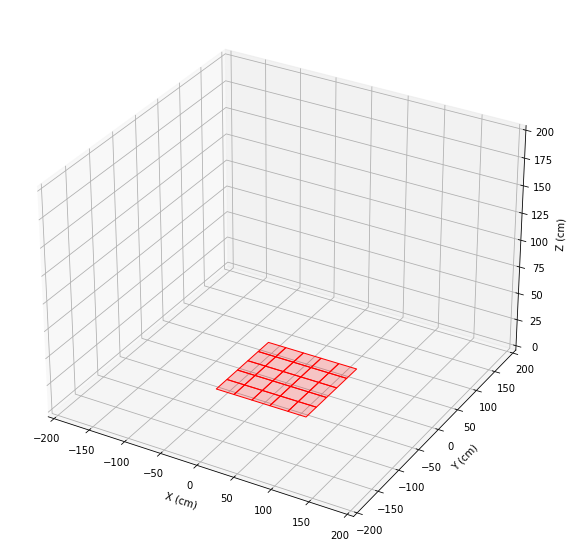

In [ ]:
# Example of tiled Detector
det = de.Set_Detector_Module(50, 50, 0, 25)
print(len(det))
print(det[0])

fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for d in det:
    z = d.position[2]
    d.plot(ax, color='red')

ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(0, 200)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')

plt.show()

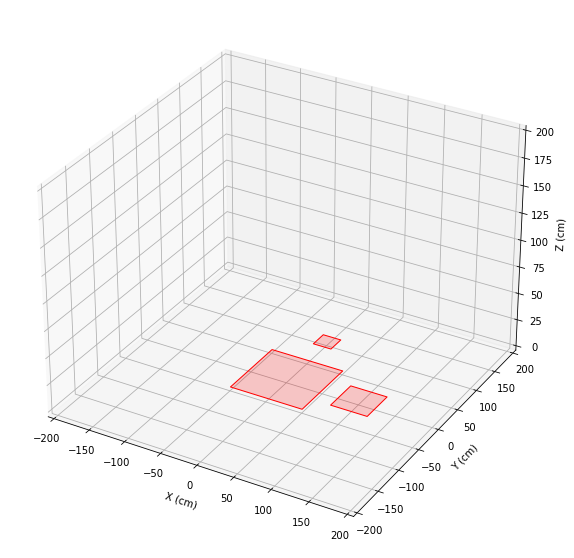

In [10]:
# Want to set Detector Module piece by piece
det2 = []
det2.append(DetectorModule(100, (0, 0, 0)))
det2.append(DetectorModule(50, (100, 0, 0)))
det2.append(DetectorModule(25, (0, 100, 0)))

fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for d in det2:
    z = d.position[2]
    d.plot(ax, color='red')

ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(0, 200)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')

plt.show()

In [11]:
# Calculate total price
de.Get_Price(det2)

Total price is within budget: 147


[0. 0. 0.]
[0.57735027 0.57735027 0.57735027]
[173.20508076 173.20508076 173.20508076]


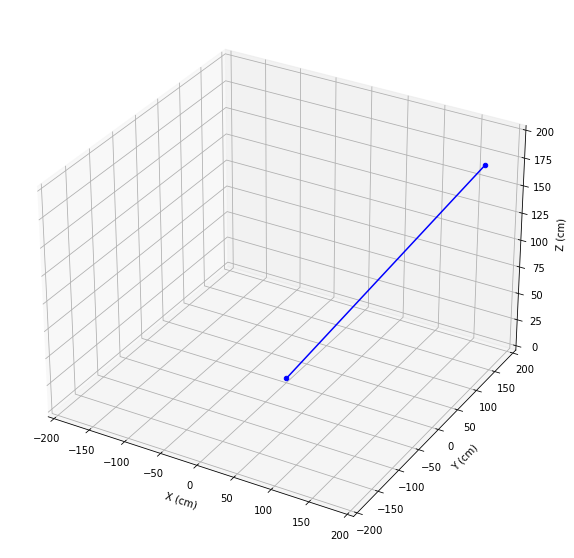

In [34]:
# Example of particle
P1 = Particle((1, 1, 1), (0, 0, 0))
print(P1.position)
print(P1.direction)
print(P1.position_t(300))

fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(P1.position[0], P1.position[1], P1.position[2], color='b')
ax.scatter(P1.position_t(300)[0], P1.position_t(300)[1], P1.position_t(300)[2], color='b')
ax.plot([P1.position[0], P1.position_t(300)[0]], [P1.position[1],P1.position_t(300)[1]],[P1.position[2],P1.position_t(300)[2]], color="b", zorder=100)

ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(0, 200)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')

plt.show()